In [35]:
import argparse
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [36]:
file = "../Physicell/output/new_results/diffusion_single_001/microenv_single_diffusion.csv"
pc_df= pd.read_csv(file,index_col=0)
pc_df = pc_df.loc[pc_df.index == 13]
timesteps = np.concatenate((np.linspace(0, 1, num=11)[:-1], np.arange(1, 11, 1)))
timesteps


array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        2. ,  3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. ])

In [37]:

timesteps_rounded = np.round(timesteps, 2)
pc_df['timestep'] = pc_df['timestep'].round(2)
# selected_rows = pc_df[pc_df['timestep_rounded'].isin(timesteps_rounded)]
# pc_sr = selected_rows.drop('timestep_rounded', axis=1)
pc_df
# pc_sr

,x,y,z,vol,diff,timestep
13,0.00000,0.00000,0.00000,8000.00000,0.00000,0.00000
13,0.00000,0.00000,0.00000,8000.00000,1416.97856,0.01000
13,0.00000,0.00000,0.00000,8000.00000,2479.52539,0.02000
13,0.00000,0.00000,0.00000,8000.00000,3276.29522,0.03000
13,0.00000,0.00000,0.00000,8000.00000,3873.76739,0.04000
...,...,...,...,...,...,...
13,0.00000,0.00000,0.00000,8000.00000,5664.92239,9.96000
13,0.00000,0.00000,0.00000,8000.00000,5664.92239,9.97000
13,0.00000,0.00000,0.00000,8000.00000,5664.92239,9.98000
13,0.00000,0.00000,0.00000,8000.00000,5664.92239,9.99000


In [38]:
file = "../Biodynamo/unit_test_diffusion_small/data.csv"
bd_df= pd.read_csv(file,index_col=None,header=None,sep = " ",names = ['timestep','avg_diff','cen_diff'])
# df['timestep'] = df.index /100

In [39]:
# df = pd.DataFrame(df[[14,'timestep']])
timesteps = np.concatenate((np.linspace(0, 1, num=11)[:-1], np.arange(1, 11, 1),[9.99]))
timesteps_rounded = np.round(timesteps, 2)
bd_df['timestep_rounded'] = bd_df['timestep'].round(2)
selected_rows = bd_df[bd_df['timestep_rounded'].isin(timesteps_rounded)]
bd_df
# selected_rows

,timestep,avg_diff,cen_diff,timestep_rounded
0,0.00000,0.00000,0.00000,0.00000
1,0.01000,9.62963,0.00000,0.01000
2,0.02000,9.73333,2.80000,0.02000
3,0.03000,9.80593,4.76000,0.03000
4,0.04000,9.85674,6.13200,0.04000
...,...,...,...,...
995,9.95000,9.97531,9.33333,9.95000
996,9.96000,9.97531,9.33333,9.96000
997,9.97000,9.97531,9.33333,9.97000
998,9.98000,9.97531,9.33333,9.98000


In [40]:
file = "../Tisim/unit_test_diffusion/results/diffusion_1_cell.csv"
ts_df= pd.read_csv(file,names = ['timestep','diff'],header=0)

# df= pd.read_csv(file,delimiter="\t",usecols=[0,14],names = ['timestep','diff'],header=0)
ts_df = pd.concat([pd.DataFrame({"timestep": [0],"diff":[0]}), ts_df], ignore_index=True)
# timesteps = np.concatenate((np.linspace(0, 1, num=11)[:-1], np.arange(1, 11, 1)))
# timesteps_rounded = np.round(timesteps, 2)
# ts_df['timestep_rounded'] = ts_df['timestep'].round(2)
# ts_df = ts_df[ts_df['timestep_rounded'].isin(timesteps_rounded)]
ts_df

,timestep,diff
0,0.00000,0.00000
1,0.01000,0.14808
2,0.02000,0.20830
3,0.03000,0.79144
4,0.04000,1.49762
...,...,...
1197,11.97000,9.35545
1198,11.98000,9.35545
1199,11.99000,9.35545
1200,12.00000,9.35545


In [41]:
file="../Chaste/unit_test_diffusion/results/TestDiffusionSmall03.dat"
ch_df= pd.read_csv(file,sep='\s+',names = ['timestep','diff'],header=0)
timesteps = np.concatenate((np.linspace(0, 1, num=11)[:-1], np.arange(1, 11, 1)))
timesteps_rounded = np.round(timesteps, 2)
ch_df['timestep_rounded'] = ch_df['timestep'].round(2)
selected_rows = ch_df[ch_df['timestep_rounded'].isin(timesteps_rounded)]
ch_df

,timestep,diff,timestep_rounded
0,0.00000,0.00000,0.00000
1,0.01000,2.39024,0.01000
2,0.02000,4.18291,0.02000
3,0.03000,5.52742,0.03000
4,0.04000,6.53580,0.04000
...,...,...,...
996,9.96000,9.56077,9.96000
997,9.97000,9.56077,9.97000
998,9.98000,9.56077,9.98000
999,9.99000,9.56077,9.99000


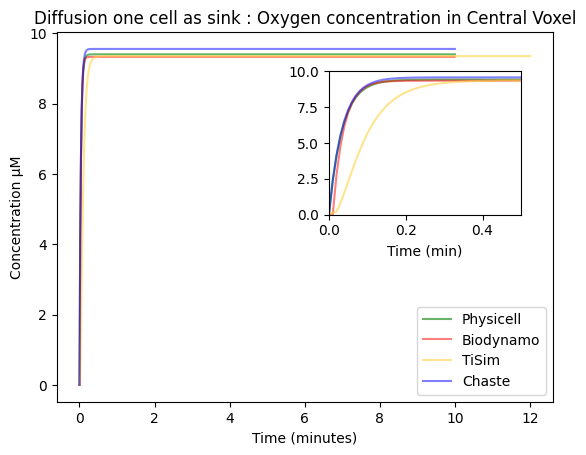

In [42]:
plt.plot(pc_df['timestep'],pc_df['diff']/602.2,label = 'Physicell',color='green',alpha=0.6)
plt.plot(bd_df['timestep'],bd_df['cen_diff'],label = 'Biodynamo',alpha=0.5,color = 'red')
plt.plot(ts_df['timestep'],ts_df['diff'],label = 'TiSim', color  = '#ffd343',alpha=0.6)
plt.plot(ch_df['timestep'],ch_df['diff'],label = 'Chaste', color  = 'blue',alpha = 0.5)
# plt.plot(ground_truth['timestep'].round(2),ground_truth['diff'],label = 'Alya', color  = 'purple',alpha = 0.5)
plt.ylabel("Concentration μM")
plt.xlabel("Time (minutes)")
plt.legend()
plt.title("Diffusion one cell as sink : Oxygen concentration in Central Voxel")
ax_inset = plt.axes([0.55, 0.5, 0.3, 0.3])  # [left, bottom, width, height]
ax_inset.plot(pc_df['timestep'], pc_df['diff'] / 602.2, color='green', alpha=0.6)
ax_inset.plot(bd_df['timestep'], bd_df['cen_diff'], color='red', alpha=0.5)
ax_inset.plot(ts_df['timestep'], ts_df['diff'], color='#ffd343', alpha=0.6)
ax_inset.plot(ch_df['timestep'], ch_df['diff'], color='blue', alpha=0.5)

# Set limits for the inset
ax_inset.set_xlim(0, 0.5)
ax_inset.set_ylim(bottom=0)  # Adjust as needed for your data

# Optional: Add labels to the inset
ax_inset.set_xlabel("Time (min)")
# ax_inset.set_ylabel("Concentration μM")
plt.savefig("./updated_concentration_one_cell.png",dpi=200)
plt.show()


In [43]:
max_pc = (pc_df['diff']/602.2).max()
max_pc

np.float64(9.40704481511778)

In [44]:
max_bd = bd_df['cen_diff'].max()
max_bd

np.float64(9.33333)

In [45]:
max_ch = ch_df['diff'].max()
max_ch

np.float64(9.56077142)

In [48]:
ts_max=ts_df['diff'].max()
ts_max

np.float64(9.35545)

In [49]:
max_ch - max_bd

np.float64(0.2274414199999999)